# Task Analysis for TaskVine Workflows
This notebook analyzes the number of total tasks and recovery tasks in TaskVine workflow logs.

In [3]:
#!python3 generate_data.py exp2_dv5_rc1 exp3_dv5_ct0 exp3_dv5_ct5 exp3_dv5_ct10 exp3_dv5_ct15 exp3_dv5_ct20 exp3_dv5_ct25 exp3_dv5_ct30 exp3_dv5_ct35 exp2_dv5_rc2 exp2_dv5_rc3 exp2_dv5_rc4 exp2_dv5_rc5 exp2_dv5_rc6 exp2_dv5_rc7 exp2_dv5_rc8 exp2_dv5_rc9

In [4]:
import os
import sys
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import tqdm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.patches as patches
import matplotlib.font_manager as fm
import time
from typing import Dict, Tuple
from concurrent.futures import ThreadPoolExecutor

sys.path.append(os.path.abspath('.'))
from src.data_parse import DataParser

LOGDIR = 'logs'
benchmark_log = "exp2_dv5_rc1"
replication_logs = ["exp2_dv5_rc2", "exp2_dv5_rc3", "exp2_dv5_rc4", "exp2_dv5_rc5", 
                    "exp2_dv5_rc6", "exp2_dv5_rc7", "exp2_dv5_rc8", "exp2_dv5_rc9",]
checkpointing_logs = ["exp2_dv5_ct0", "exp2_dv5_ct5", "exp2_dv5_ct10", "exp2_dv5_ct15",
                      "exp2_dv5_ct20", "exp2_dv5_ct25", "exp2_dv5_ct30", "exp2_dv5_ct35"]

logs = [benchmark_log] + checkpointing_logs + replication_logs
logs = [os.path.join(LOGDIR, log) for log in logs]

def load_one_log(log_path):
    print(f"Loading log: {log_path}")
    parser = DataParser(log_path)
    parser.restore_from_checkpoint()
    return parser

data_parsers = []
for log_path in tqdm.tqdm(logs, desc="Loading logs"):
    data_parsers.append(load_one_log(log_path))


Loading logs:   0%|          | 0/17 [00:00<?, ?it/s]

Loading log: logs/exp2_dv5_rc1
Restoring workers.pkl took 3.5507 seconds
Restoring files.pkl took 9.8268 seconds


Loading logs:   6%|▌         | 1/17 [00:17<04:42, 17.66s/it]

Restoring tasks.pkl took 4.1947 seconds
Restoring manager.pkl took 0.0019 seconds
Restoring subgraphs.pkl took 0.0861 seconds
Loading log: logs/exp2_dv5_ct0
Restoring workers.pkl took 4.5303 seconds
Restoring files.pkl took 13.9412 seconds


Loading logs:  12%|█▏        | 2/17 [00:44<05:50, 23.34s/it]

Restoring tasks.pkl took 8.7394 seconds
Restoring manager.pkl took 0.0016 seconds
Restoring subgraphs.pkl took 0.094 seconds
Loading log: logs/exp2_dv5_ct5
Restoring workers.pkl took 1.6848 seconds
Restoring files.pkl took 15.6868 seconds


Loading logs:  18%|█▊        | 3/17 [01:04<05:01, 21.50s/it]

Restoring tasks.pkl took 1.8503 seconds
Restoring manager.pkl took 0.0018 seconds
Restoring subgraphs.pkl took 0.0949 seconds
Loading log: logs/exp2_dv5_ct10
Restoring workers.pkl took 10.0455 seconds
Restoring files.pkl took 12.1614 seconds


Loading logs:  24%|██▎       | 4/17 [01:28<04:53, 22.56s/it]

Restoring tasks.pkl took 1.8895 seconds
Restoring manager.pkl took 0.0017 seconds
Restoring subgraphs.pkl took 0.0912 seconds
Loading log: logs/exp2_dv5_ct15
Restoring workers.pkl took 1.6504 seconds
Restoring files.pkl took 14.2868 seconds


Loading logs:  29%|██▉       | 5/17 [01:46<04:10, 20.88s/it]

Restoring tasks.pkl took 1.8529 seconds
Restoring manager.pkl took 0.0018 seconds
Restoring subgraphs.pkl took 0.0908 seconds
Loading log: logs/exp2_dv5_ct20
Restoring workers.pkl took 16.2758 seconds
Restoring files.pkl took 2.6502 seconds


Loading logs:  35%|███▌      | 6/17 [02:23<04:50, 26.41s/it]

Restoring tasks.pkl took 18.1298 seconds
Restoring manager.pkl took 0.002 seconds
Restoring subgraphs.pkl took 0.0872 seconds
Loading log: logs/exp2_dv5_ct25
Restoring workers.pkl took 1.5355 seconds
Restoring files.pkl took 2.5705 seconds


Loading logs:  41%|████      | 7/17 [02:49<04:21, 26.11s/it]

Restoring tasks.pkl took 21.3042 seconds
Restoring manager.pkl took 0.002 seconds
Restoring subgraphs.pkl took 0.0827 seconds
Loading log: logs/exp2_dv5_ct30
Restoring workers.pkl took 1.5264 seconds
Restoring files.pkl took 2.5775 seconds


Loading logs:  47%|████▋     | 8/17 [02:54<02:57, 19.67s/it]

Restoring tasks.pkl took 1.7013 seconds
Restoring manager.pkl took 0.0018 seconds
Restoring subgraphs.pkl took 0.0846 seconds
Loading log: logs/exp2_dv5_ct35
Restoring workers.pkl took 1.5429 seconds
Restoring files.pkl took 25.73 seconds


Loading logs:  53%|█████▎    | 9/17 [03:23<03:00, 22.61s/it]

Restoring tasks.pkl took 1.703 seconds
Restoring manager.pkl took 0.002 seconds
Restoring subgraphs.pkl took 0.0915 seconds
Loading log: logs/exp2_dv5_rc2
Restoring workers.pkl took 1.5368 seconds
Restoring files.pkl took 29.6804 seconds


Loading logs:  59%|█████▉    | 10/17 [03:56<03:00, 25.82s/it]

Restoring tasks.pkl took 1.7059 seconds
Restoring manager.pkl took 0.0021 seconds
Restoring subgraphs.pkl took 0.0877 seconds
Loading log: logs/exp2_dv5_rc3
Restoring workers.pkl took 1.553 seconds
Restoring files.pkl took 3.3533 seconds


Loading logs:  65%|██████▍   | 11/17 [04:03<01:59, 19.97s/it]

Restoring tasks.pkl took 1.7109 seconds
Restoring manager.pkl took 0.0018 seconds
Restoring subgraphs.pkl took 0.0832 seconds
Loading log: logs/exp2_dv5_rc4
Restoring workers.pkl took 33.7738 seconds
Restoring files.pkl took 3.7596 seconds


Loading logs:  71%|███████   | 12/17 [04:43<02:09, 25.86s/it]

Restoring tasks.pkl took 1.714 seconds
Restoring manager.pkl took 0.0018 seconds
Restoring subgraphs.pkl took 0.0885 seconds
Loading log: logs/exp2_dv5_rc5
Restoring workers.pkl took 1.5999 seconds
Restoring files.pkl took 41.2707 seconds


Loading logs:  76%|███████▋  | 13/17 [05:27<02:06, 31.54s/it]

Restoring tasks.pkl took 1.6568 seconds
Restoring manager.pkl took 0.0018 seconds
Restoring subgraphs.pkl took 0.0823 seconds
Loading log: logs/exp2_dv5_rc6
Restoring workers.pkl took 1.5476 seconds
Restoring files.pkl took 4.3965 seconds


Loading logs:  82%|████████▏ | 14/17 [05:35<01:13, 24.34s/it]

Restoring tasks.pkl took 1.6643 seconds
Restoring manager.pkl took 0.002 seconds
Restoring subgraphs.pkl took 0.0878 seconds
Loading log: logs/exp2_dv5_rc7
Restoring workers.pkl took 3.1674 seconds
Restoring files.pkl took 49.4357 seconds


Loading logs:  88%|████████▊ | 15/17 [06:29<01:06, 33.40s/it]

Restoring tasks.pkl took 1.6895 seconds
Restoring manager.pkl took 0.0018 seconds
Restoring subgraphs.pkl took 0.0852 seconds
Loading log: logs/exp2_dv5_rc8
Restoring workers.pkl took 1.5794 seconds
Restoring files.pkl took 5.2092 seconds


Loading logs:  94%|█████████▍| 16/17 [07:30<00:41, 41.49s/it]

Restoring tasks.pkl took 53.3984 seconds
Restoring manager.pkl took 0.0018 seconds
Restoring subgraphs.pkl took 0.0891 seconds
Loading log: logs/exp2_dv5_rc9
Restoring workers.pkl took 1.5799 seconds
Restoring files.pkl took 5.6676 seconds


Loading logs: 100%|██████████| 17/17 [07:39<00:00, 27.01s/it]

Restoring tasks.pkl took 1.7349 seconds
Restoring manager.pkl took 0.0016 seconds
Restoring subgraphs.pkl took 0.0984 seconds


In [5]:
def get_task_completion_frame(tasks):

    when_first_task_starts = float('inf')
    for task in tasks.values():
        if task.when_running:
            when_first_task_starts = min(when_first_task_starts, task.when_running)
    
    regular_tasks = []
    for task_id, task in tasks.items():
        if not task.is_recovery_task and task.when_retrieved:
            regular_tasks.append({
                'task_id': task_id,
                'completion_time': task.when_retrieved - when_first_task_starts
            })
    
    sorted_tasks = sorted(regular_tasks, key=lambda x: x['completion_time'])
    
    if sorted_tasks:
        total_tasks = len(sorted_tasks)
        for i, task_data in enumerate(sorted_tasks):
            task_data['rank'] = i + 1
            task_data['percent_complete'] = (i + 1) / total_tasks * 100
            
        df = pd.DataFrame(sorted_tasks)
    else:
        df = pd.DataFrame(columns=['task_id', 'completion_time', 'rank', 'percent_complete'])
    
    return df

task_completion_frames = []
for data_parser in data_parsers:
    task_completion_frames.append(get_task_completion_frame(data_parser.tasks))

In [6]:
template_mapping = {
    'exp2_dv5_rc1': {'label': 'Baseline', 'color': "#000000", 'linestyle': '-'},
    # Replication strategies
    'exp2_dv5_rc2': {'label': 'R=2', 'color': "#e41a1c", 'linestyle': '-'},
    'exp2_dv5_rc3': {'label': 'R=3', 'color': "#ff7f00", 'linestyle': '-'},
    'exp2_dv5_rc4': {'label': 'R=4', 'color': "#984ea3", 'linestyle': '-'},
    'exp2_dv5_rc5': {'label': 'R=5', 'color': "#4daf4a", 'linestyle': '-'},
    'exp2_dv5_rc6': {'label': 'R=6', 'color': "#377eb8", 'linestyle': '-'},
    'exp2_dv5_rc7': {'label': 'R=7', 'color': "#f781bf", 'linestyle': '-'},
    'exp2_dv5_rc8': {'label': 'R=8', 'color': "#a65628", 'linestyle': '-'},
    'exp2_dv5_rc9': {'label': 'R=9', 'color': "#984ea3", 'linestyle': '-'},
    # Checkpointing strategies
    'exp2_dv5_ct0': {'label': 'T=0', 'color': "#347eb8", 'linestyle': '-.'},
    'exp2_dv5_ct5': {'label': 'T=5', 'color': "#377eb8", 'linestyle': '-'},
    'exp2_dv5_ct10': {'label': 'T=10', 'color': "#4daf4a", 'linestyle': '-'},
    'exp2_dv5_ct15': {'label': 'T=15', 'color': "#984ea3", 'linestyle': '-'},
    'exp2_dv5_ct20': {'label': 'T=20', 'color': "#ff7f00", 'linestyle': '-'},
    'exp2_dv5_ct25': {'label': 'T=25', 'color': "#a65628", 'linestyle': '-'},
    'exp2_dv5_ct30': {'label': 'T=30', 'color': "#984ea3", 'linestyle': '-'},
    'exp2_dv5_ct35': {'label': 'T=35', 'color': "#ff7f00", 'linestyle': '-'},
}

In [7]:
def get_template_metrics(data_parsers):
    import numpy as np
    import pandas as pd

    records = []

    for parser in data_parsers:
        template_name = parser.runtime_template.split('/')[-1].split('.')[0]
        if template_name not in template_mapping:
            continue

        label = template_mapping[template_name]['label']

        tasks = parser.tasks.values()
        files = parser.files.values()

        task_data = pd.DataFrame([
            (t.task_id, t.is_recovery_task, t.when_running, t.when_retrieved)
            for t in tasks
        ], columns=["task_id", "is_recovery", "when_running", "when_retrieved"])

        recovery_df = task_data[task_data["is_recovery"] == True]
        recovery_count = len(recovery_df)

        valid_runtime = recovery_df.dropna(subset=["when_running", "when_retrieved"])
        recovery_runtime = (valid_runtime["when_retrieved"] - valid_runtime["when_running"]).sum()

        makespan = 0
        if not task_data["when_running"].isna().all() and not task_data["when_retrieved"].isna().all():
            start = task_data["when_running"].min()
            end = task_data["when_retrieved"].max()
            if pd.notna(start) and pd.notna(end):
                makespan = end - start

        transfer_count = 0
        failed_transfer_count = 0
        total_stagein_size = 0
        
        total_transfer_time = 0

        for f in files:
            t_array = f.transfers
            transfer_count += len(t_array)
            for t in t_array:
                if getattr(t, "time_stage_in", None) is None:
                    failed_transfer_count += 1
                else:
                    total_stagein_size += f.size_mb
                    this_transfer_time = t.time_stage_in - t.time_start_stage_in
                    total_transfer_time += this_transfer_time

        avg_transfer_time = total_transfer_time / transfer_count

        if "ct" in template_name:
            group = "Checkpointing"                 
        elif template_name == "exp2_dv5_rc1":
            group = "Baseline"
        else:
            group = "Replication"

        total_stagein_size_gb = total_stagein_size / 1024

        records.append({
            "scheme": template_name,
            "label": label,
            "group": group,
            "recovery_count": recovery_count,
            "recovery_runtime": recovery_runtime,
            "transfer_count": transfer_count,
            "failed_transfer_count": failed_transfer_count,
            "total_storage_consumption_gb": total_stagein_size_gb,
            "avg_transfer_time": avg_transfer_time,
            "makespan": makespan
        })

    df = pd.DataFrame(records)
    df["group"] = pd.Categorical(df["group"], categories=["Baseline", "Checkpointing", "Replication"], ordered=True)

    return df


df = get_template_metrics(data_parsers)

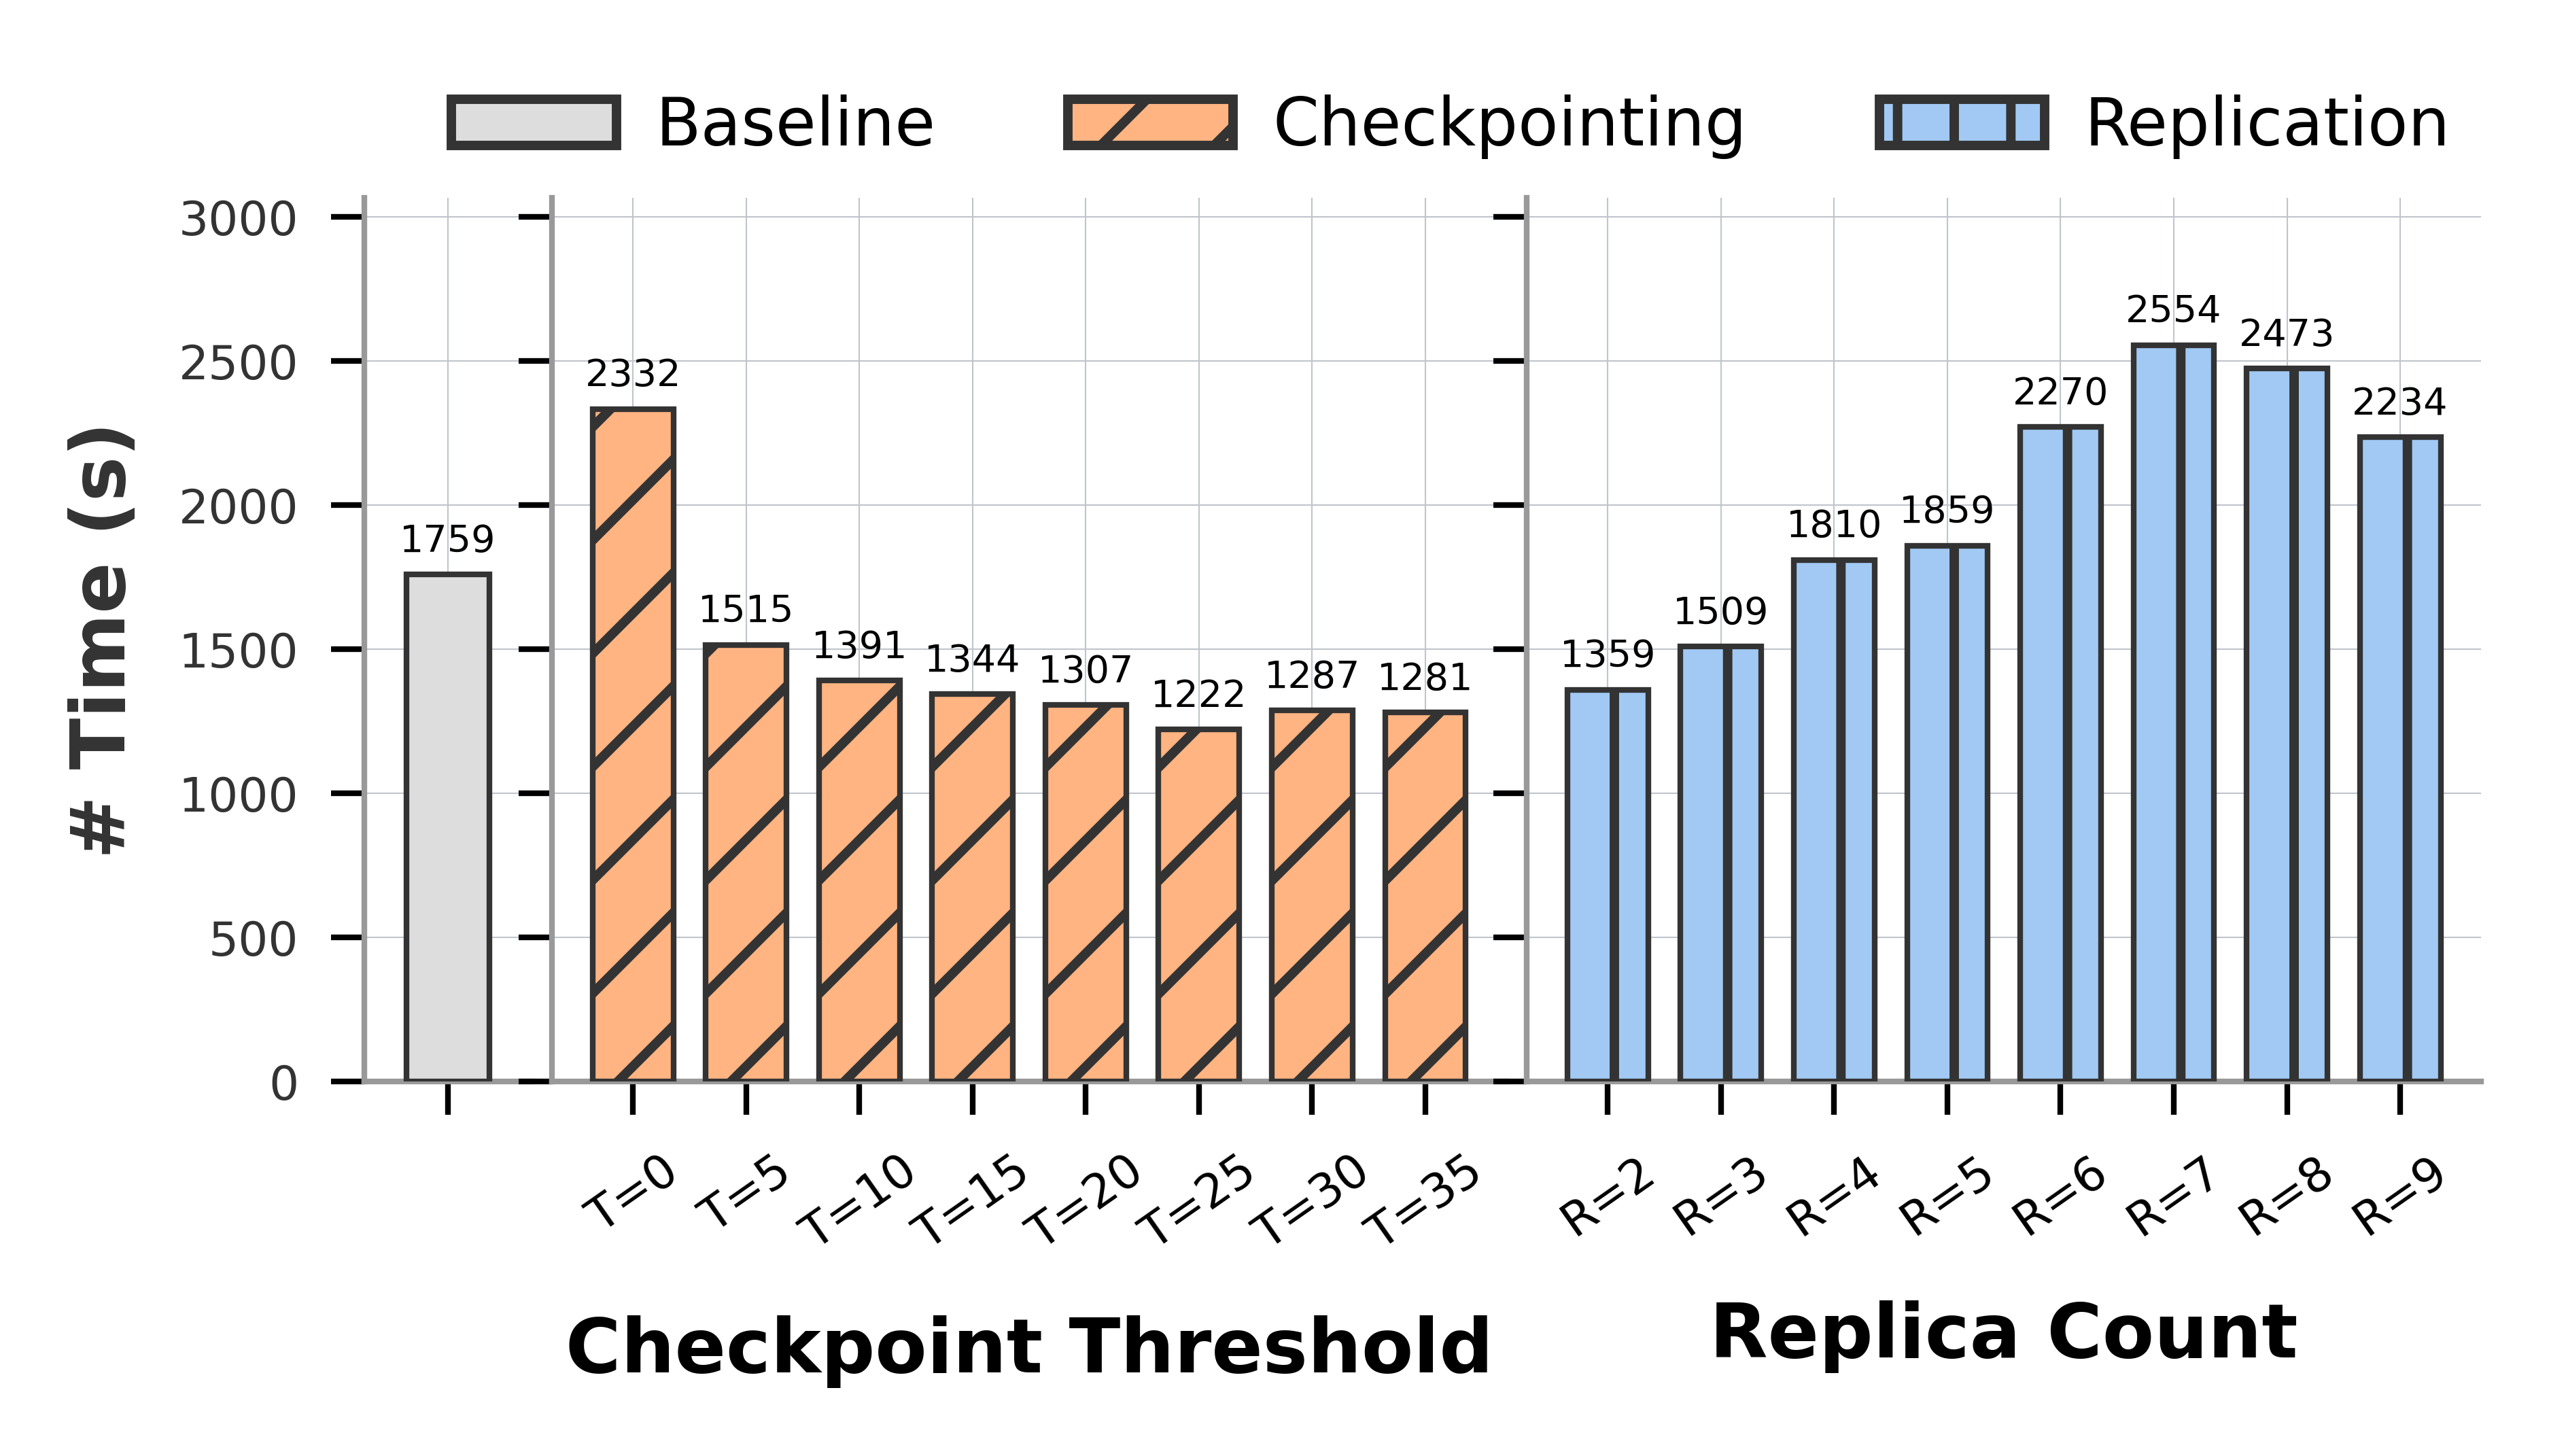

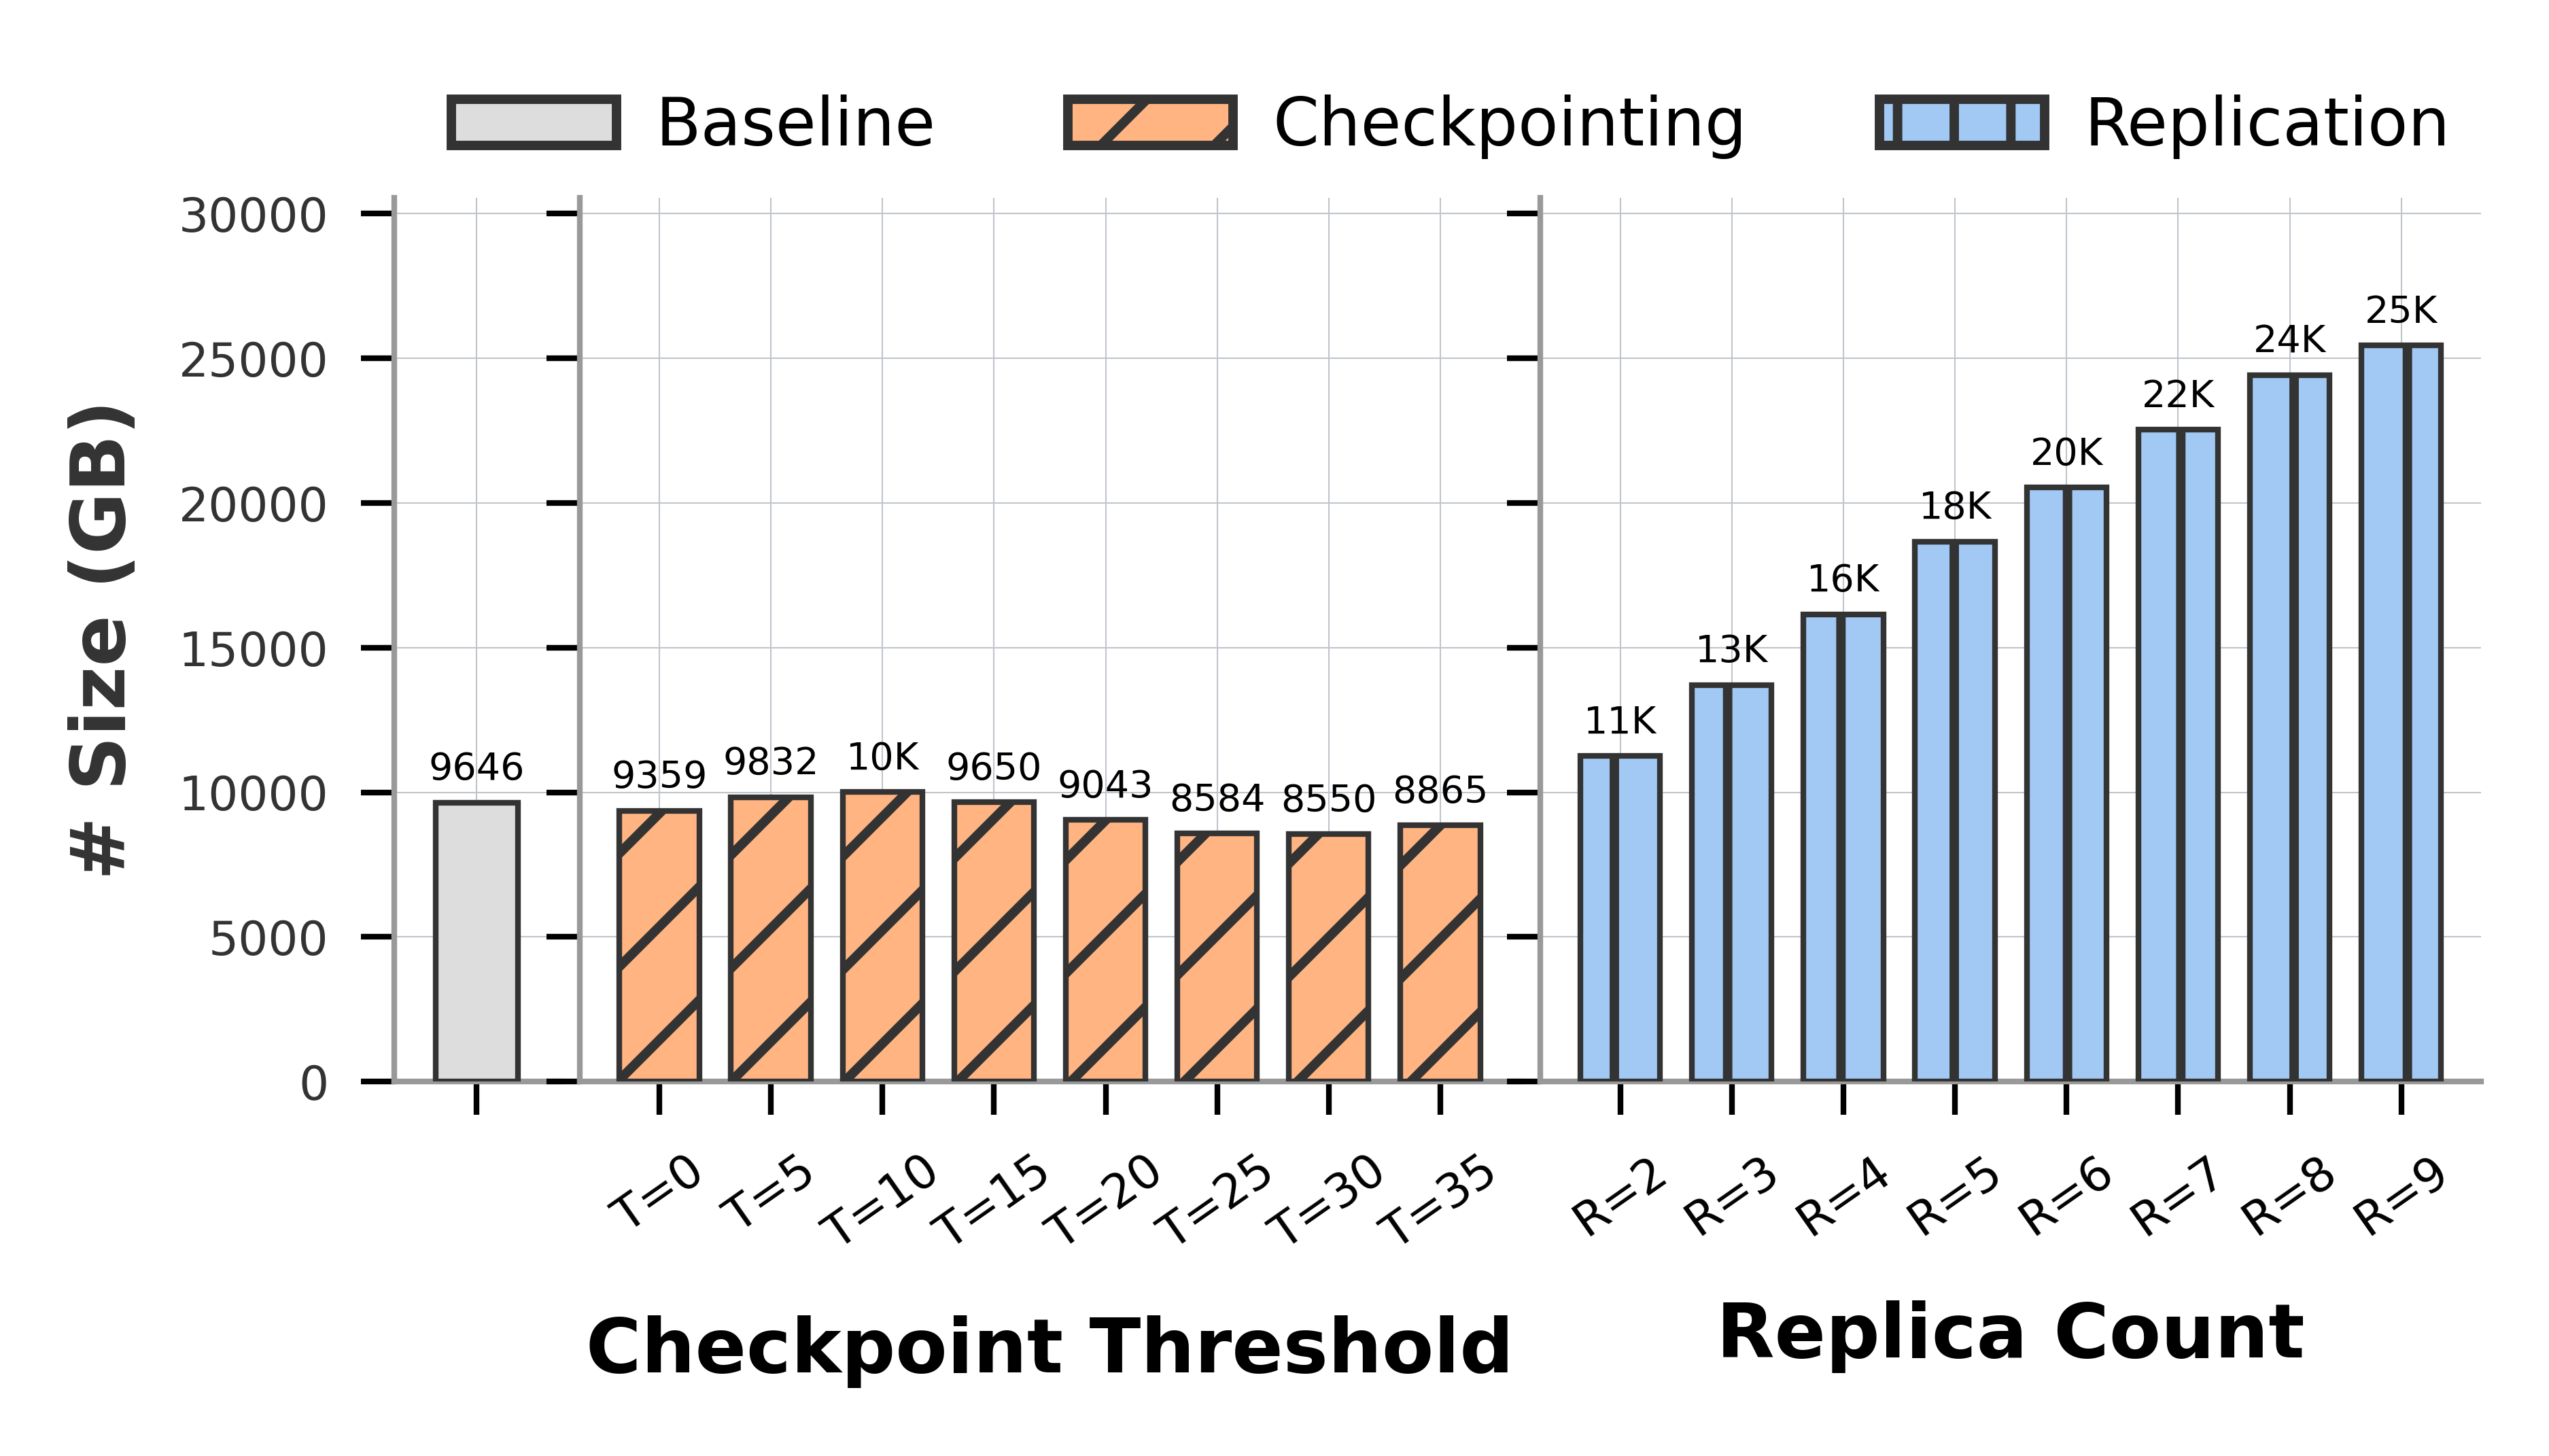

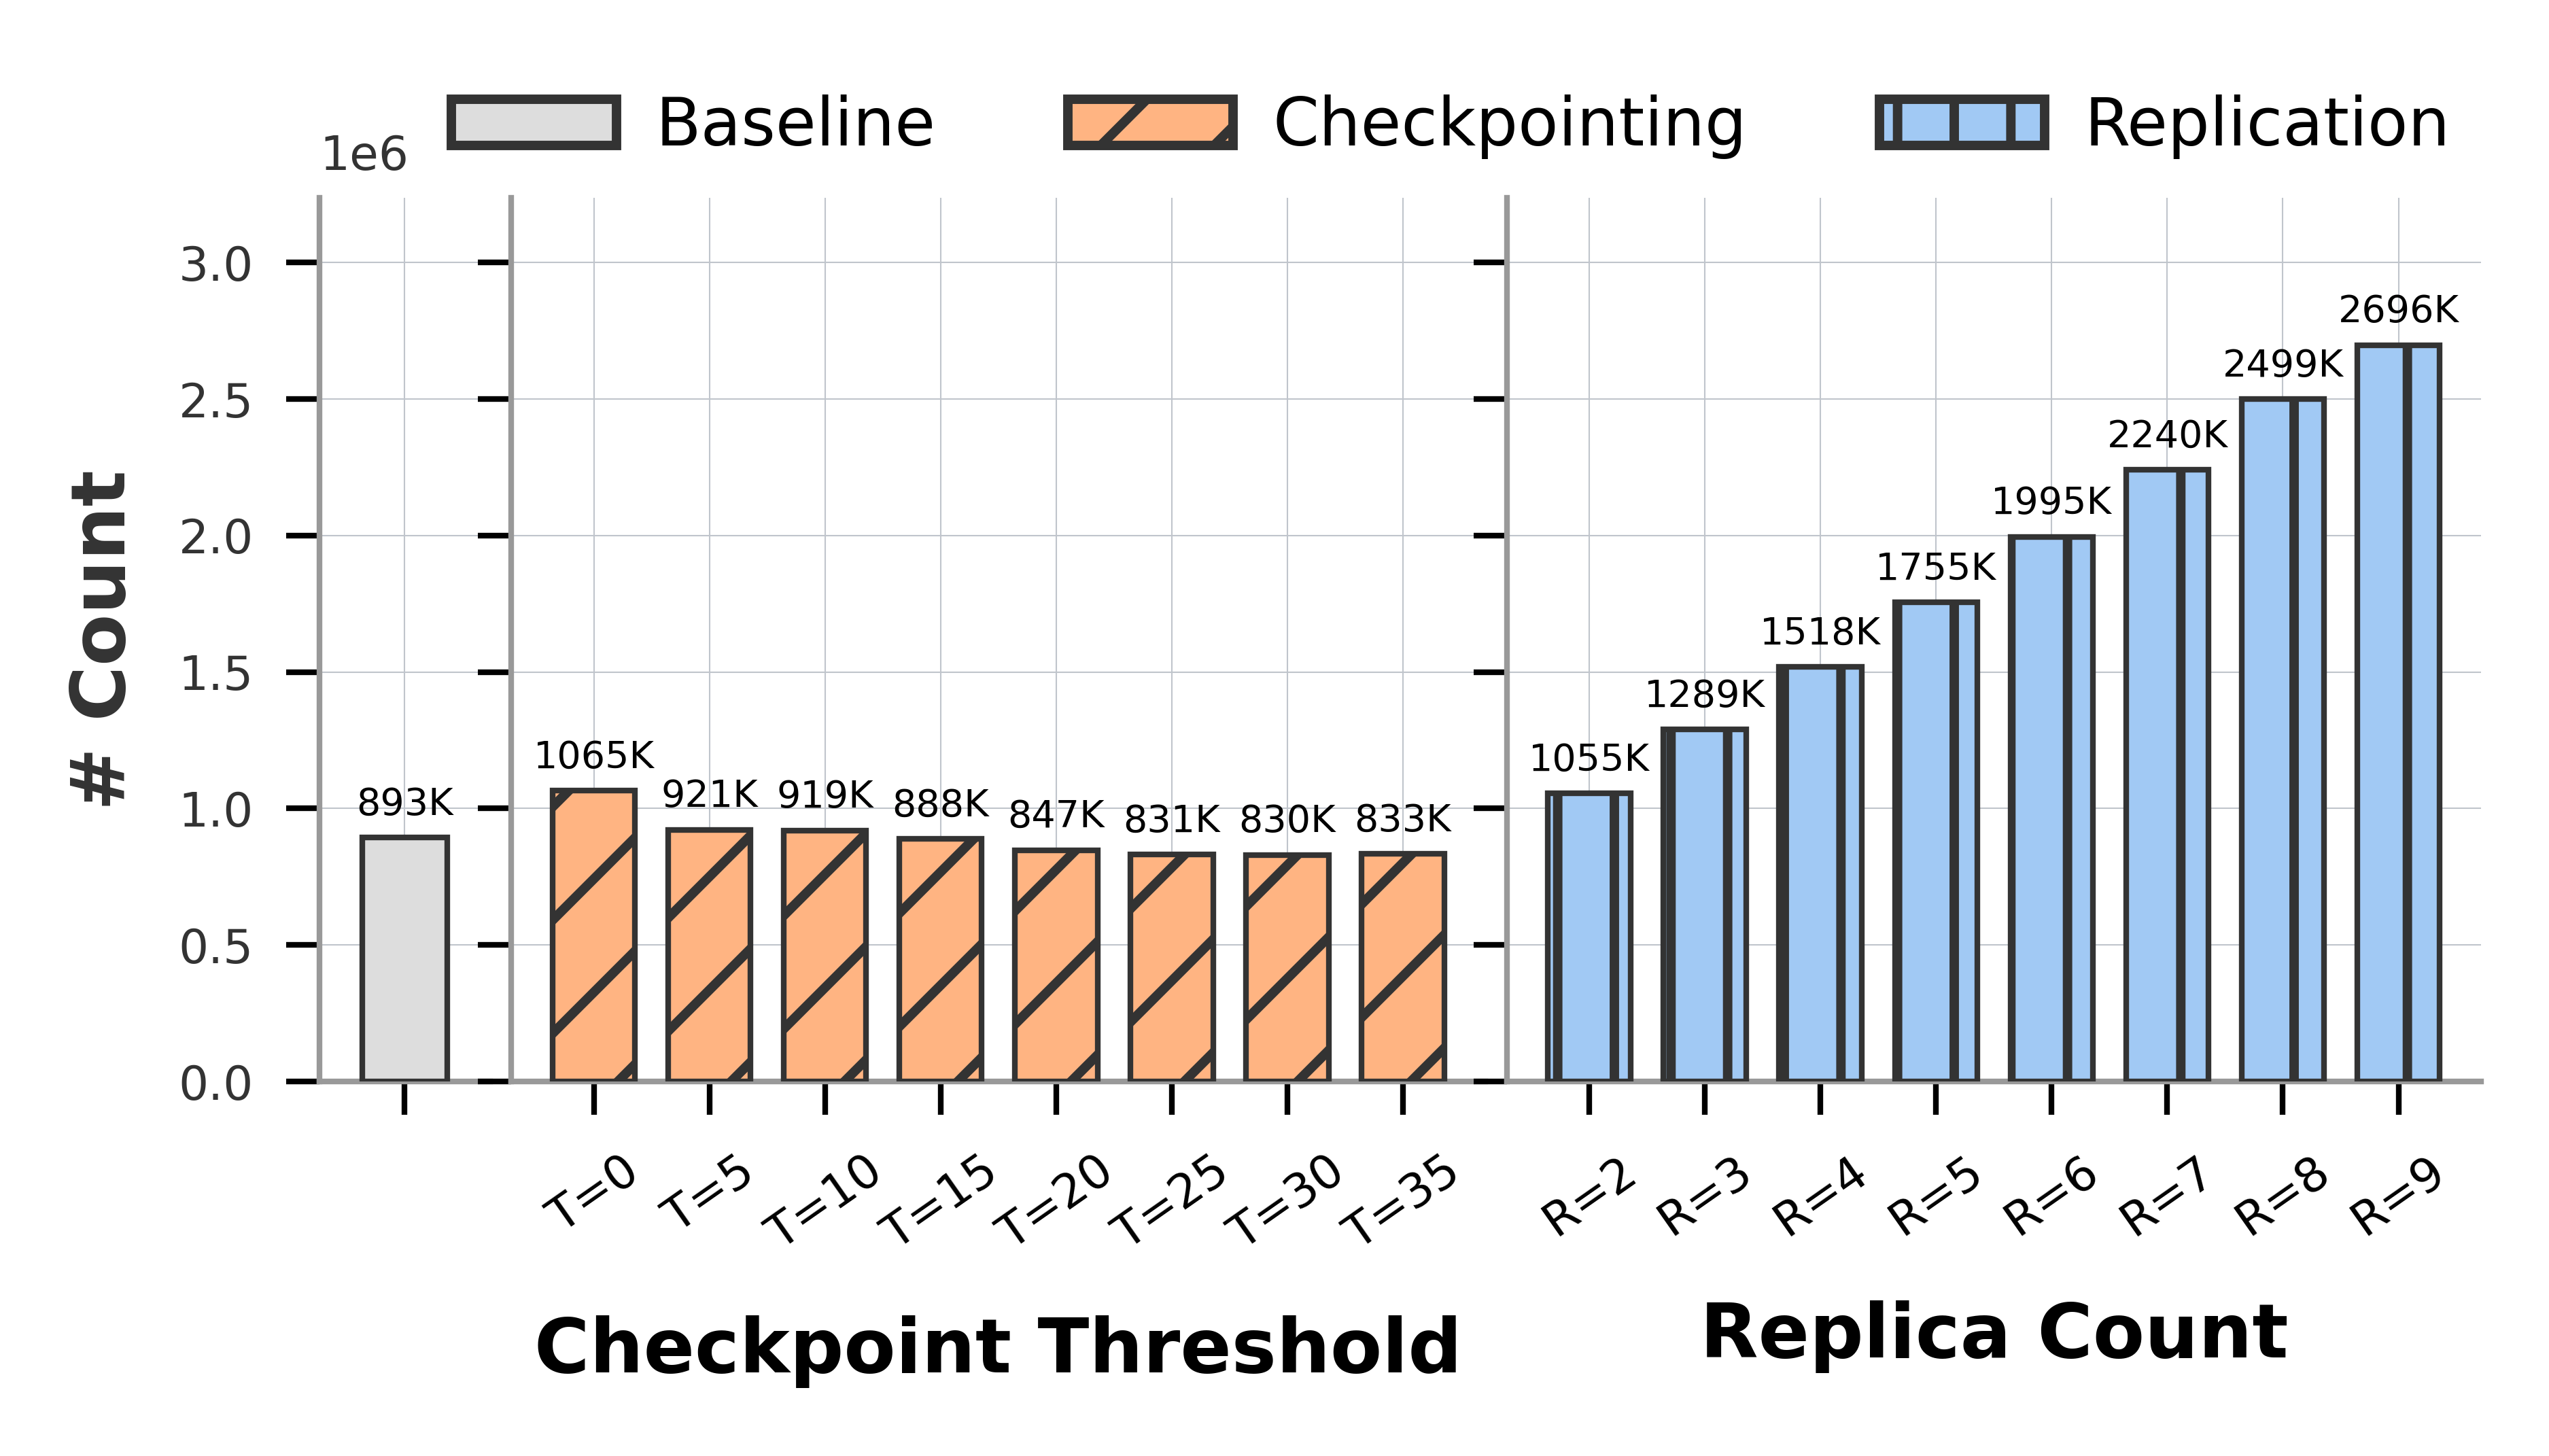

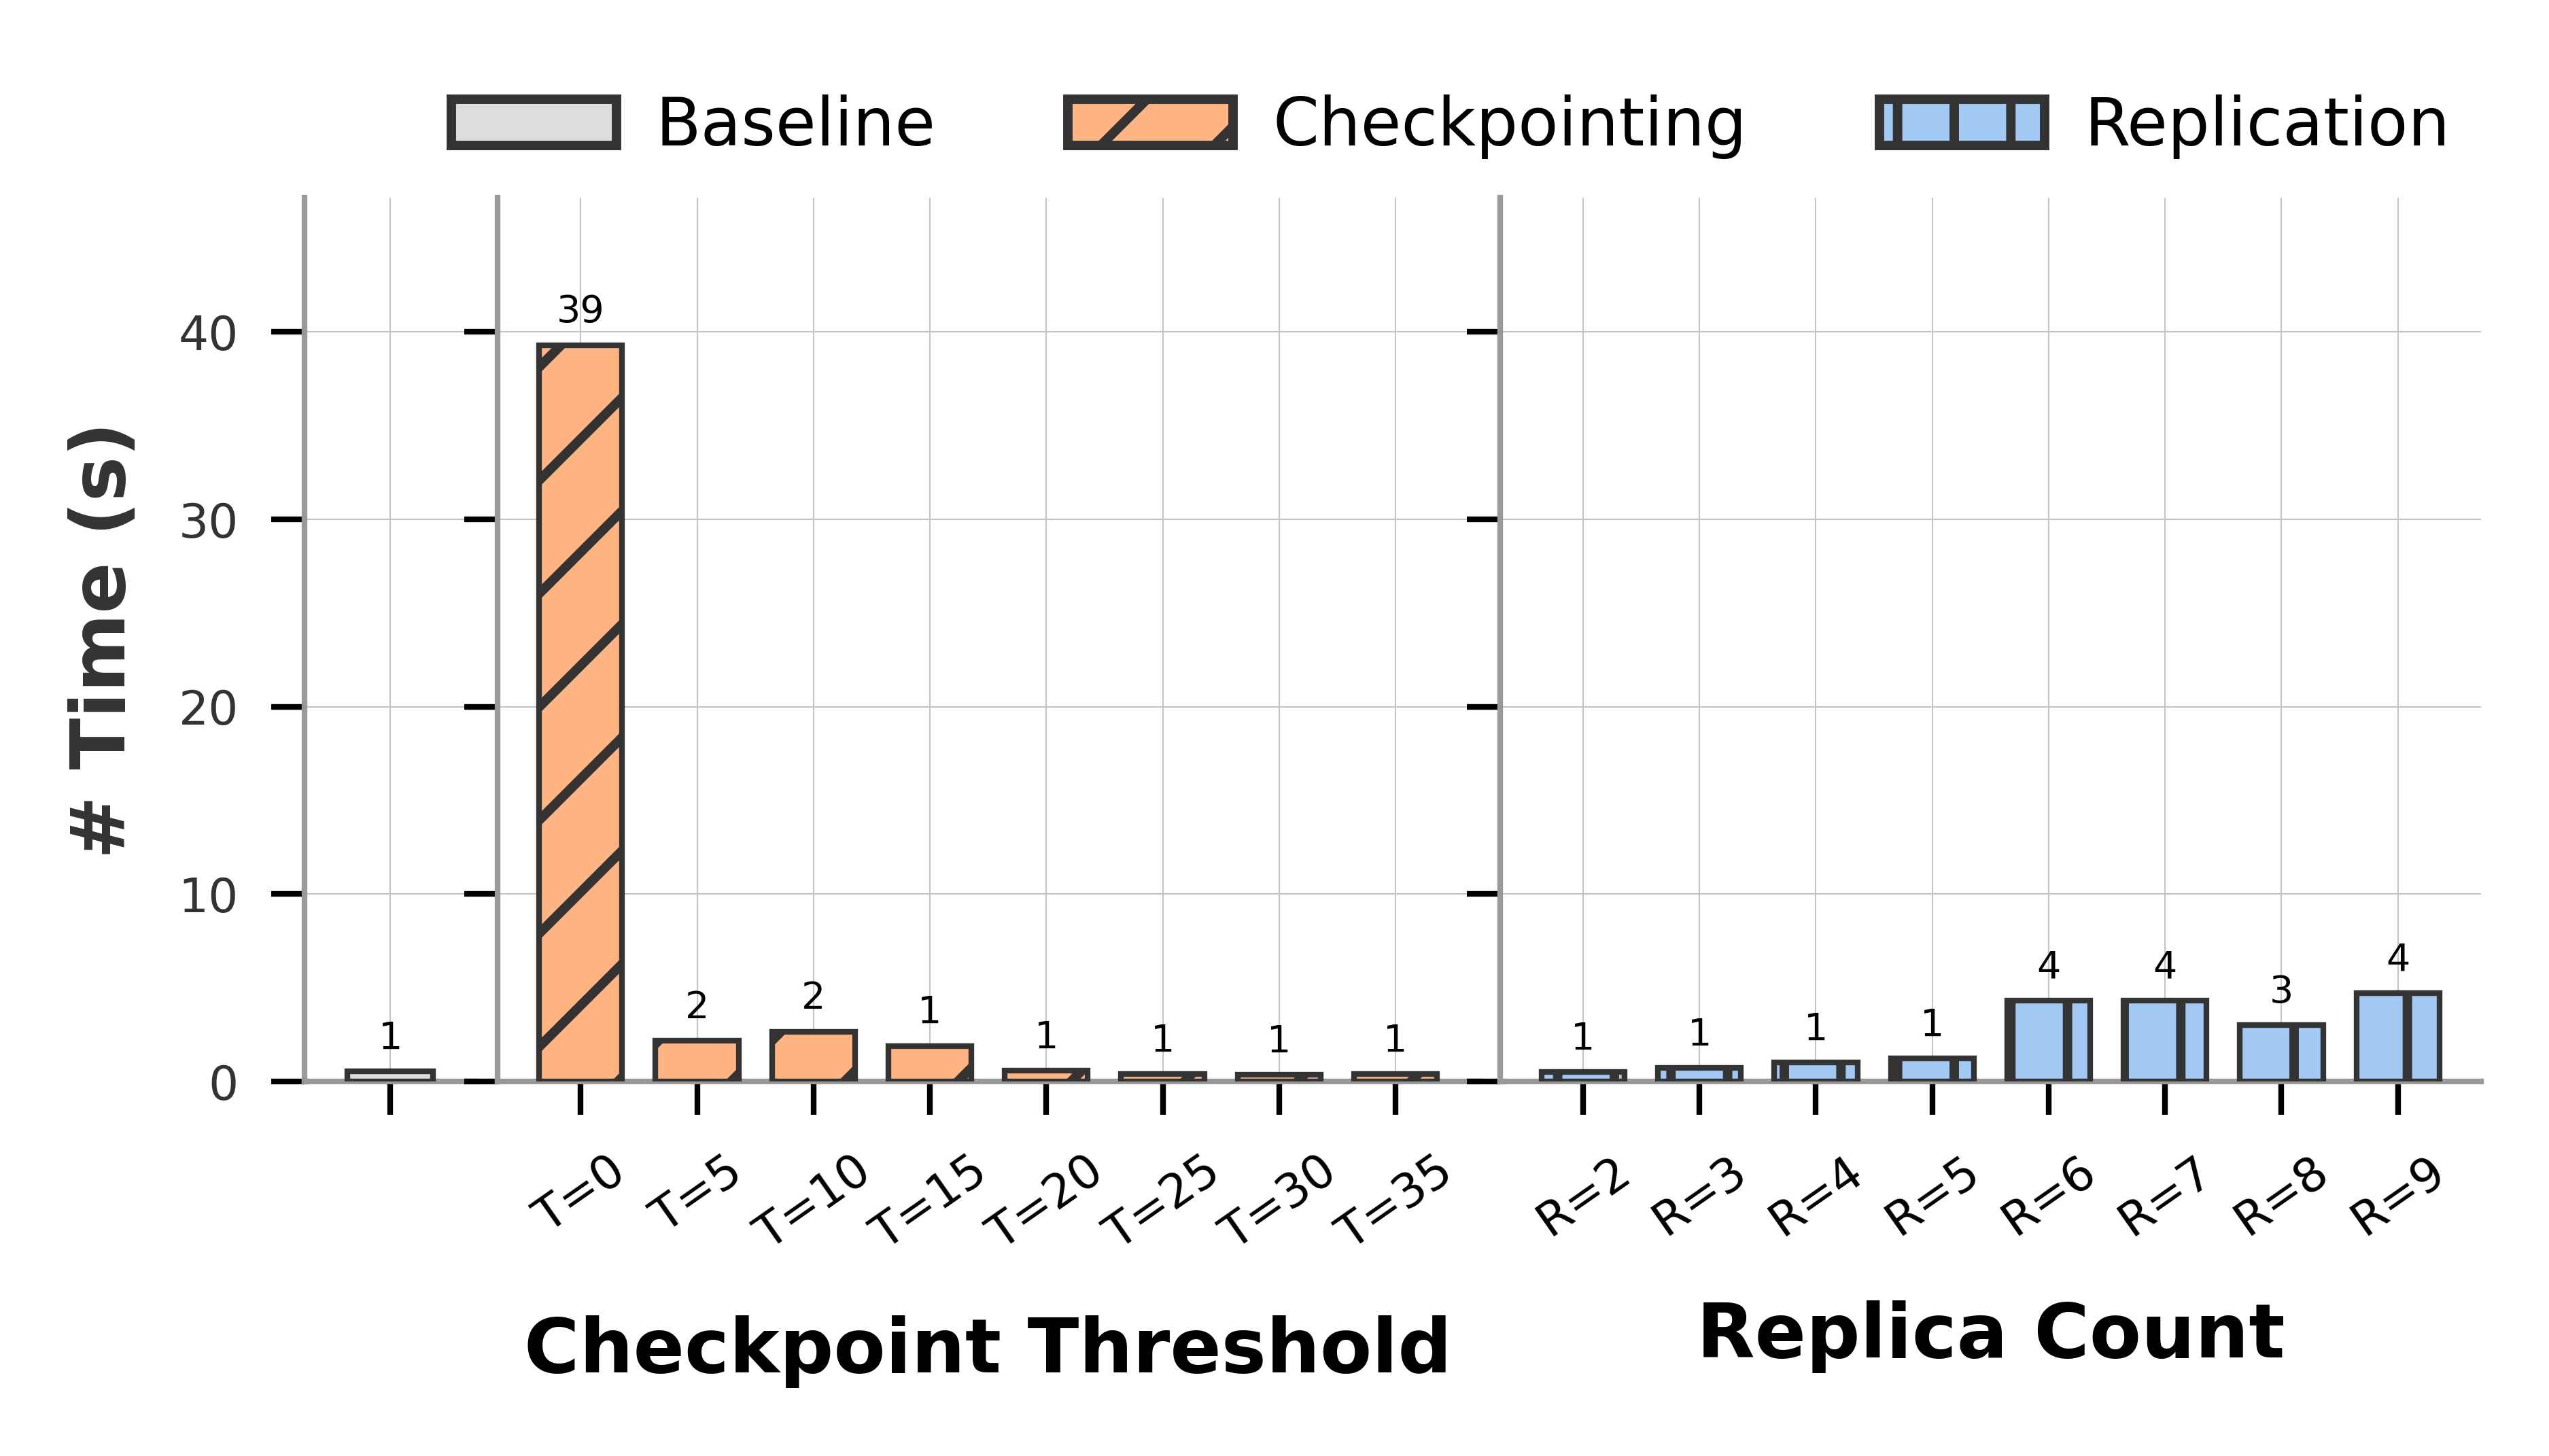

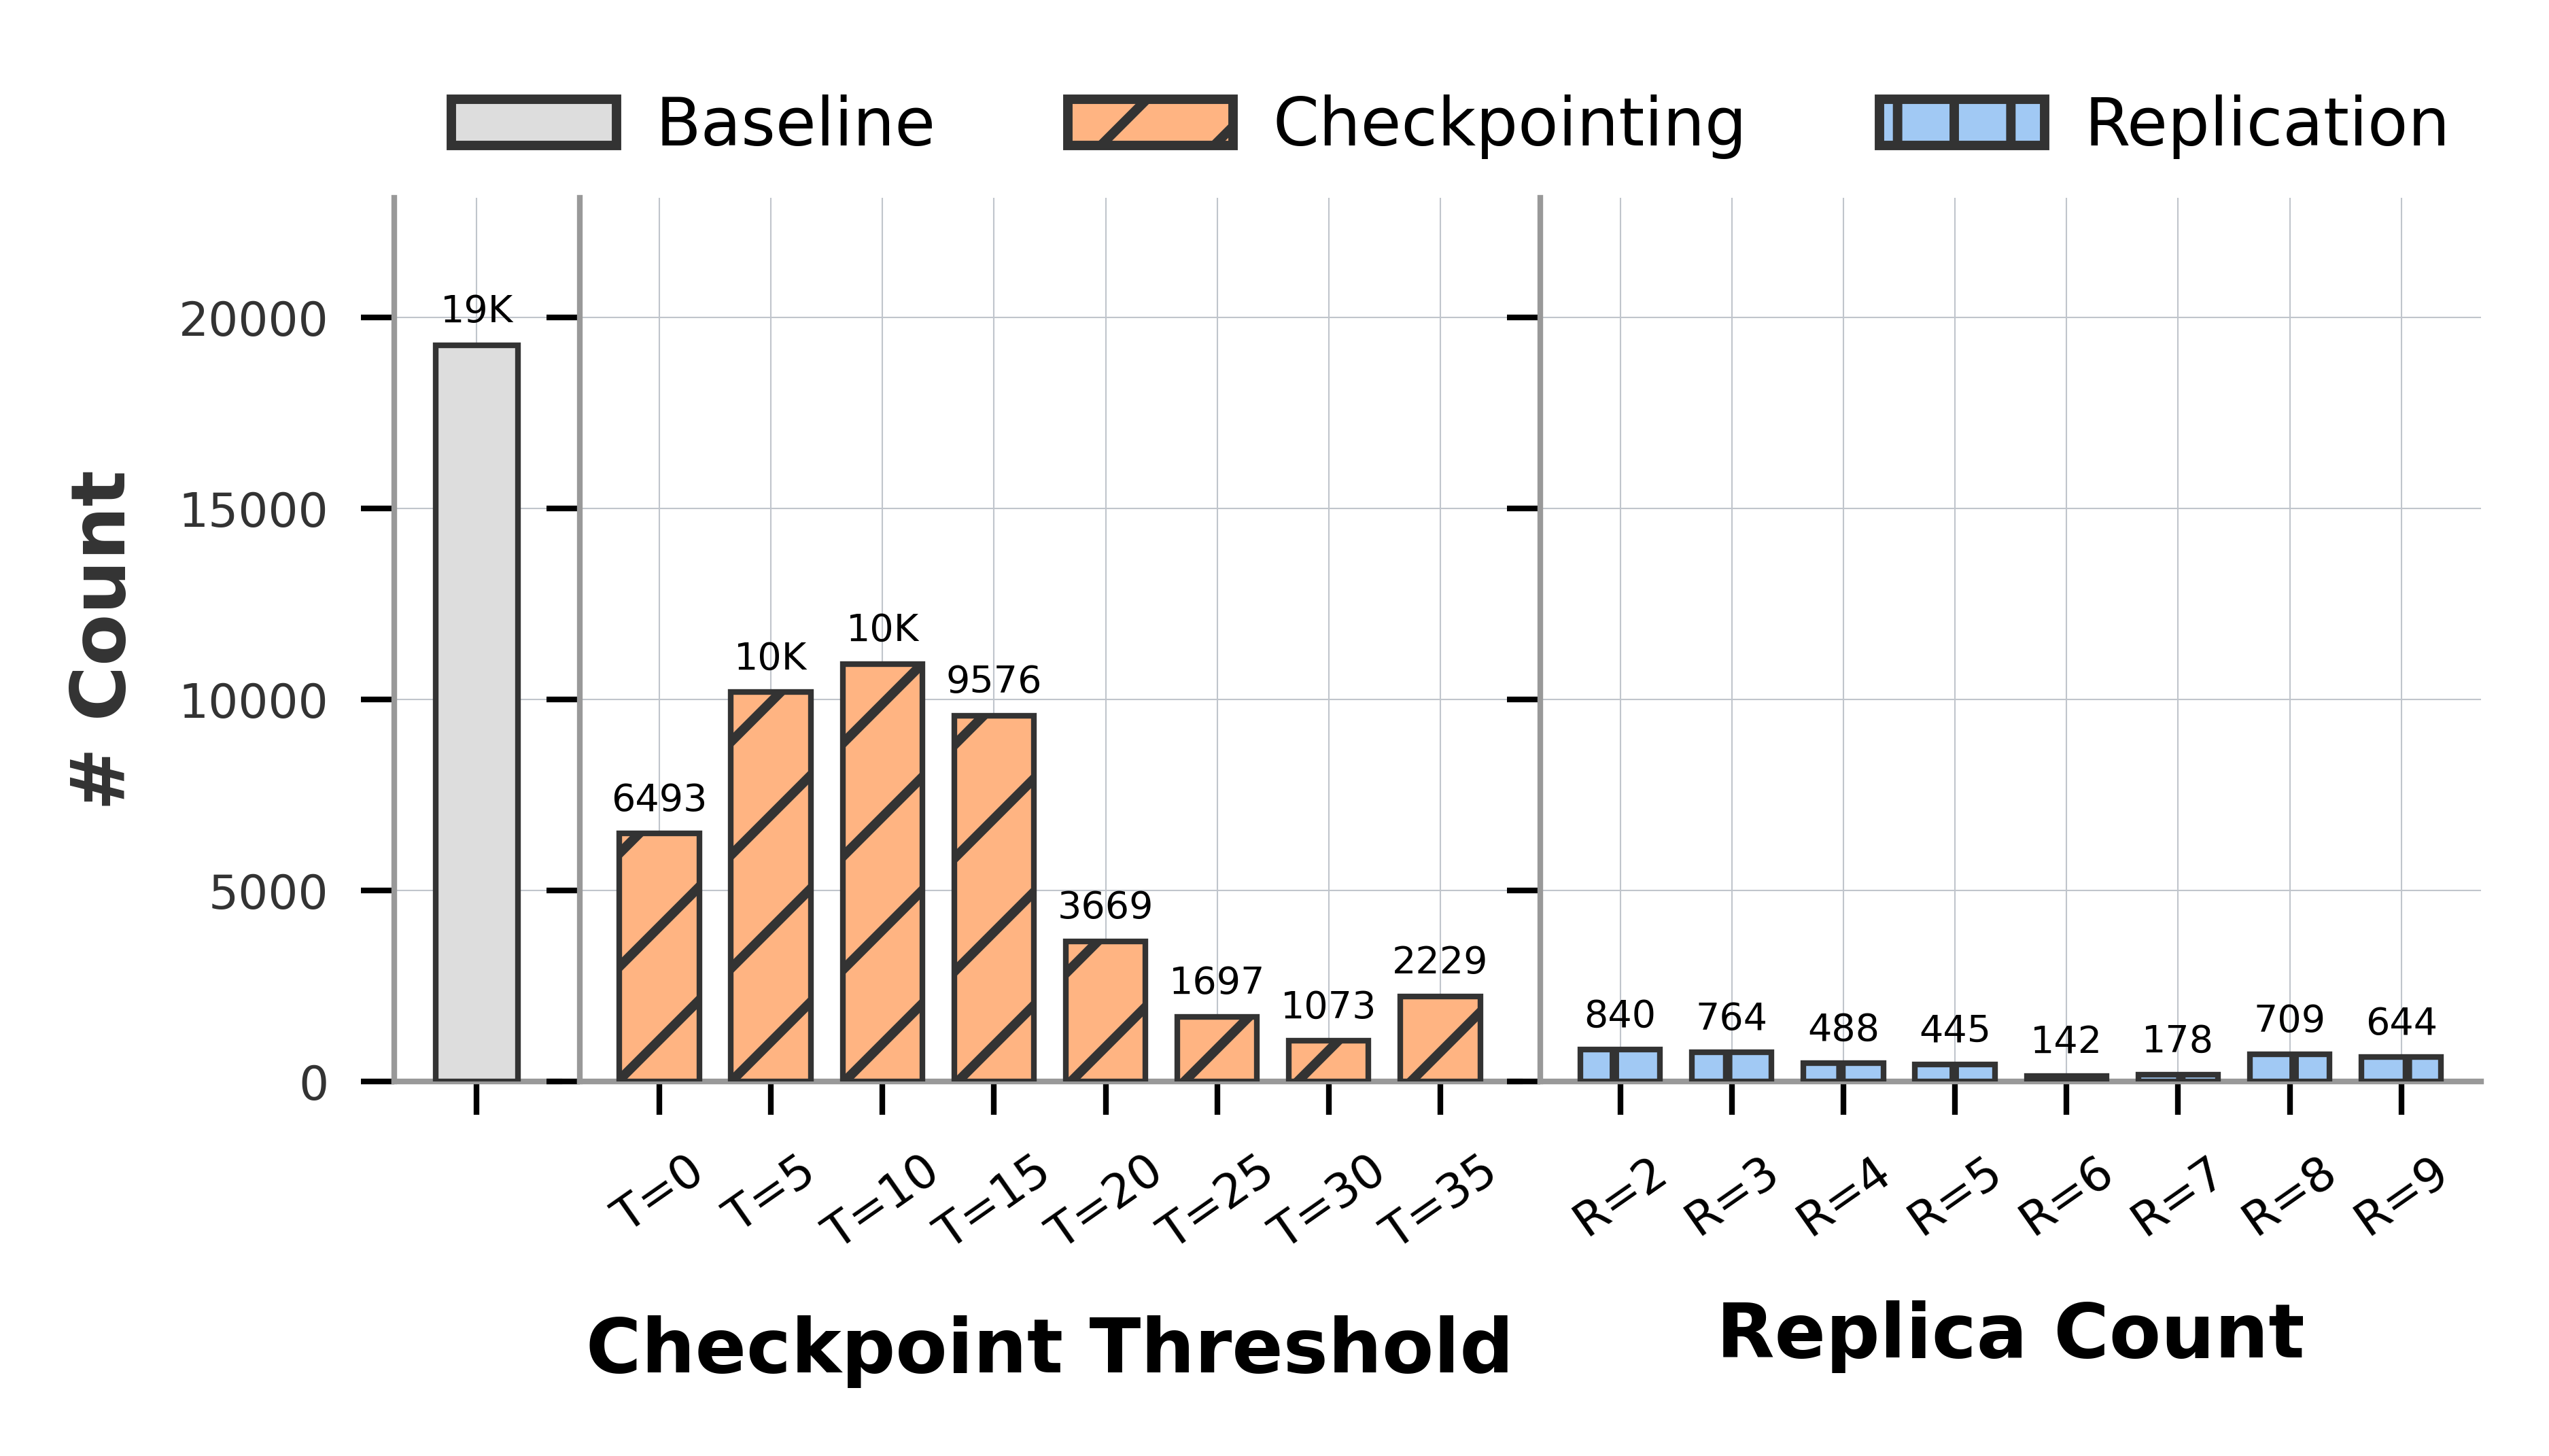

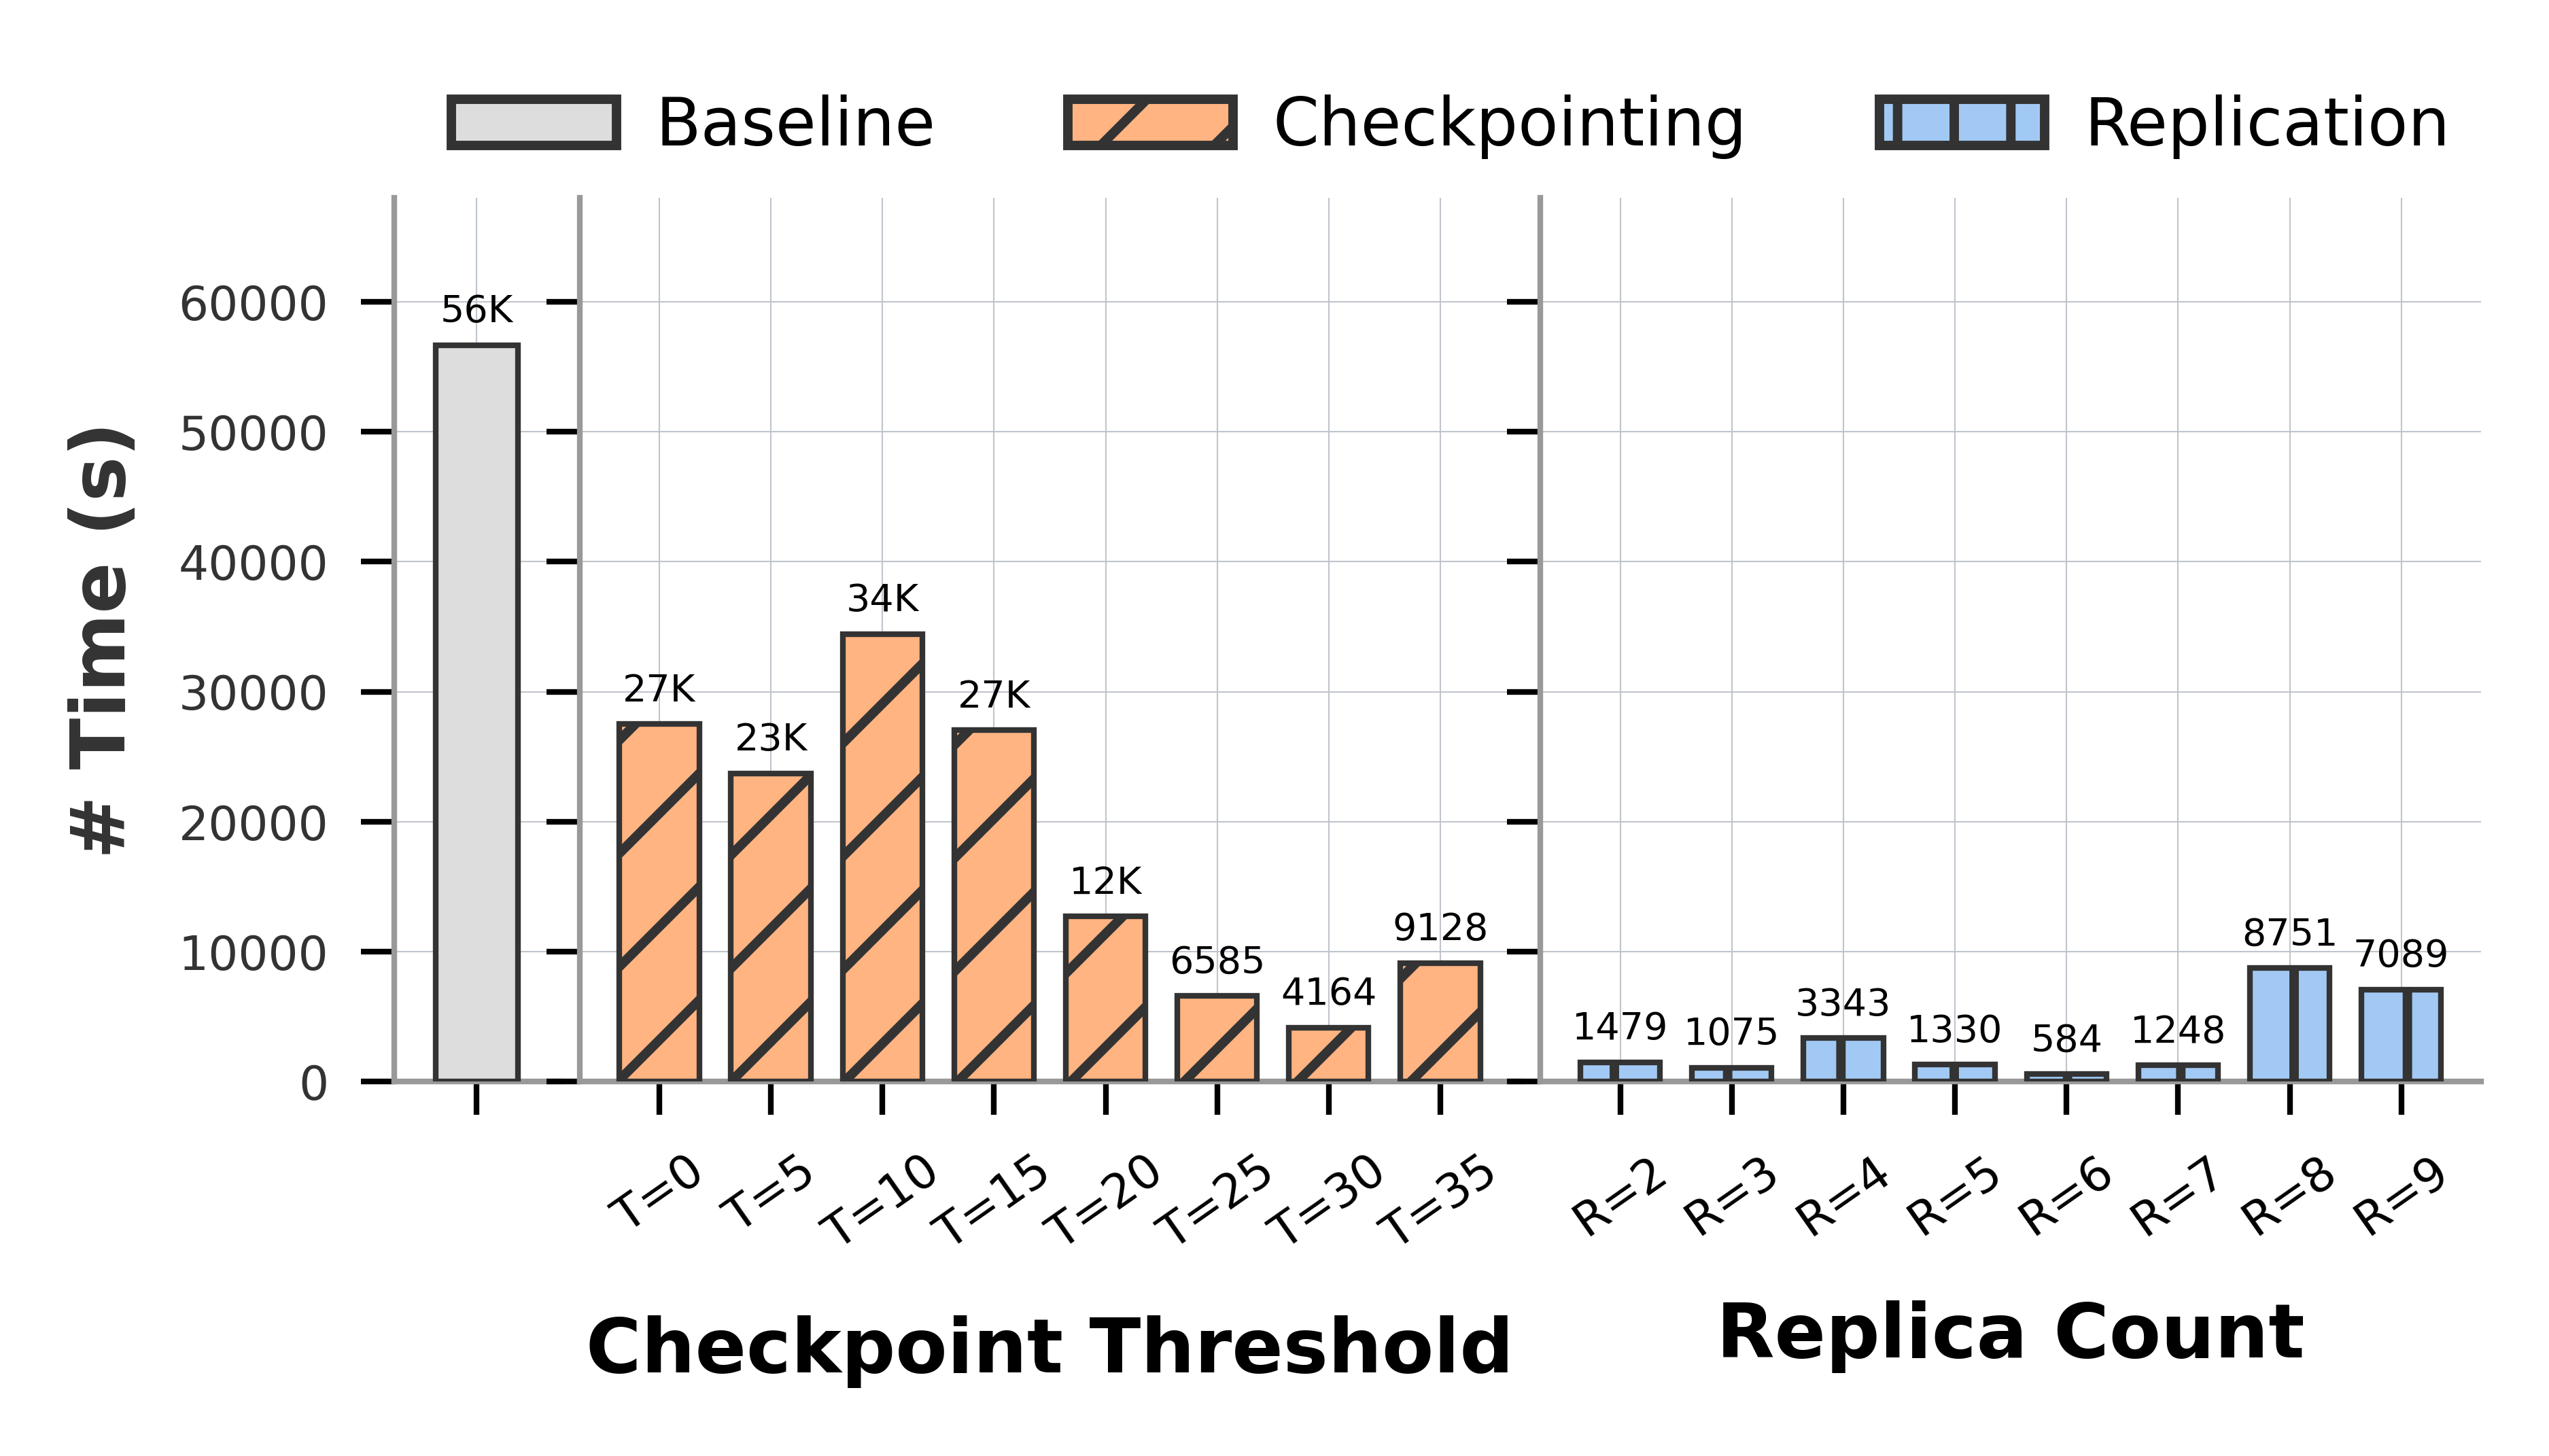

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

BAR_WIDTH = 0.15
BAR_SPACING = 0.06
FIG_WIDTH = 3.7
FIG_HEIGHT = 2
FONT_SIZE = 5
TITLE_SIZE = 8
LABEL_SIZE = 8
TICK_SIZE = 5
LEGEND_SIZE = 7
AXIS_LINEWIDTH = 0.6
GRID_LINEWIDTH = 0.15
WSPACE = 0.03
TOP_MARGIN = 0.83
BOTTOM_MARGIN = 0.18

COLOR_RECOVERY = "#ffb482"
COLOR_REPLICATION = "#a1c9f4"
COLOR_BASELINE = "#dddddd"

HATCH_RECOVERY = "//"
HATCH_REPLICATION = "||"
HATCH_BASELINE = ""

GROUP_ORDER = ["Baseline", "Checkpointing", "Replication"]
WIDTH_RATIOS = [1.4, 8, 8]

SAVEFIG_DPI = 1000
FIGURE_DPI = 1000

X_LABELS = {
    "Baseline": "",
    "Checkpointing": "Checkpoint Threshold",
    "Replication": "Replica Count"
}

def extract_numeric_key(s):
    if 'ct' in s:
        return int(s.split('_ct')[-1])
    elif 'rc' in s:
        return int(s.split('_rc')[-1])
    else:
        return -1

def init_plot_style():
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Helvetica'],
        'font.size': FONT_SIZE,
        'axes.linewidth': AXIS_LINEWIDTH,
        'axes.titlesize': TITLE_SIZE,
        'axes.labelsize': LABEL_SIZE,
        'xtick.major.width': AXIS_LINEWIDTH,
        'ytick.major.width': AXIS_LINEWIDTH,
        'xtick.labelsize': TICK_SIZE,
        'ytick.labelsize': TICK_SIZE,
        'legend.fontsize': LEGEND_SIZE,
        'figure.dpi': FIGURE_DPI,
        'savefig.dpi': SAVEFIG_DPI
    })

def plot_single_metric_grouped(df, metric_key, ylabel, save_path):
    init_plot_style()

    grouped = {g: df[df["group"] == g].copy() for g in GROUP_ORDER}
    for g in grouped:
        grouped[g]["sort_key"] = grouped[g]["scheme"].map(extract_numeric_key)
        grouped[g] = grouped[g].sort_values("sort_key").reset_index(drop=True)

    fig, axes = plt.subplots(1, 3, figsize=(FIG_WIDTH, FIG_HEIGHT), sharey=True,
                             gridspec_kw={'width_ratios': WIDTH_RATIOS})

    global_max = df[metric_key].max()

    for i, group in enumerate(GROUP_ORDER):
        ax = axes[i]
        sub = grouped[group].reset_index(drop=True)
        ax.set_facecolor('white')

        bar_positions = np.arange(len(sub)) * (BAR_WIDTH + BAR_SPACING)

        if group == "Replication":
            color = COLOR_REPLICATION
            hatch = HATCH_REPLICATION
        elif group == "Baseline":
            color = COLOR_BASELINE
            hatch = HATCH_BASELINE
        else:
            color = COLOR_RECOVERY
            hatch = HATCH_RECOVERY

        bars = ax.bar(bar_positions, sub[metric_key], width=BAR_WIDTH,
               color=color, edgecolor="#333333", linewidth=AXIS_LINEWIDTH,
               hatch=hatch, zorder=3)

        for bar, val in zip(bars, sub[metric_key]):
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + global_max * 0.02,
                f"{int(val/1000)}K" if val >= 10000 else f"{max(int(val), 1)}",
                ha='center',
                va='bottom',
                fontsize=FONT_SIZE-1,
                wrap=True,
                clip_on=True
            )

        ax.set_xticks(bar_positions)
        ax.set_xticklabels(sub["label"] if group != "Baseline" else [""], fontsize=TICK_SIZE, rotation=35)

        # ax.set_title(group, fontsize=TITLE_SIZE, fontweight='bold', color='#333333', pad=10)
        ax.grid(True, color='#c0c5cc', linestyle='-', linewidth=GRID_LINEWIDTH, zorder=0)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('#999999')
        ax.spines['bottom'].set_color('#999999')
        ax.spines['left'].set_linewidth(AXIS_LINEWIDTH)
        ax.spines['bottom'].set_linewidth(AXIS_LINEWIDTH)
        ax.set_ylim(0, global_max * 1.2)
        ax.tick_params(axis='y', labelsize=TICK_SIZE, labelcolor='#333333')

        padding = BAR_WIDTH
        ax.set_xlim(-padding, bar_positions[-1] + BAR_WIDTH)

        if i == 0:
            ax.set_ylabel(ylabel, color='#333333', fontsize=TITLE_SIZE, fontweight='bold')
        ax.tick_params(axis='y', which='both', left=True, labelleft=(i == 0))

        ax.set_xlabel(X_LABELS[group], fontsize=LABEL_SIZE, fontweight='bold', labelpad=6)

    plt.tight_layout()

    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=COLOR_BASELINE, edgecolor="#333333", label="Baseline", hatch=HATCH_BASELINE),
        Patch(facecolor=COLOR_RECOVERY, edgecolor="#333333", label="Checkpointing", hatch=HATCH_RECOVERY),
        Patch(facecolor=COLOR_REPLICATION, edgecolor="#333333", label="Replication", hatch=HATCH_REPLICATION),
    ]

    fig.legend(handles=legend_elements, loc='upper center', ncol=3, frameon=False,
               bbox_to_anchor=(0.57, 0.95), fontsize=LEGEND_SIZE, handlelength=2.5, handletextpad=0.6)

    fig.subplots_adjust(wspace=WSPACE, top=TOP_MARGIN, bottom=BOTTOM_MARGIN)

    if save_path:
        plt.savefig(save_path, dpi=SAVEFIG_DPI, bbox_inches='tight', facecolor='white')

    plt.show()


plot_single_metric_grouped(df, metric_key="makespan", ylabel="# Time (s)", save_path="imgs/ft_metrics_1.pdf")
plot_single_metric_grouped(df, metric_key="total_storage_consumption_gb", ylabel="# Size (GB)", save_path="imgs/ft_metrics_2.pdf")
plot_single_metric_grouped(df, metric_key="transfer_count", ylabel="# Count", save_path="imgs/ft_metrics_3.pdf")
plot_single_metric_grouped(df, metric_key="avg_transfer_time", ylabel="# Time (s)", save_path="imgs/ft_metrics_4.pdf")
plot_single_metric_grouped(df, metric_key="recovery_count", ylabel="# Count", save_path="imgs/ft_metrics_5.pdf")
plot_single_metric_grouped(df, metric_key="recovery_runtime", ylabel="# Time (s)", save_path="imgs/ft_metrics_6.pdf")



# Recovery Task Portion

# Task Completion

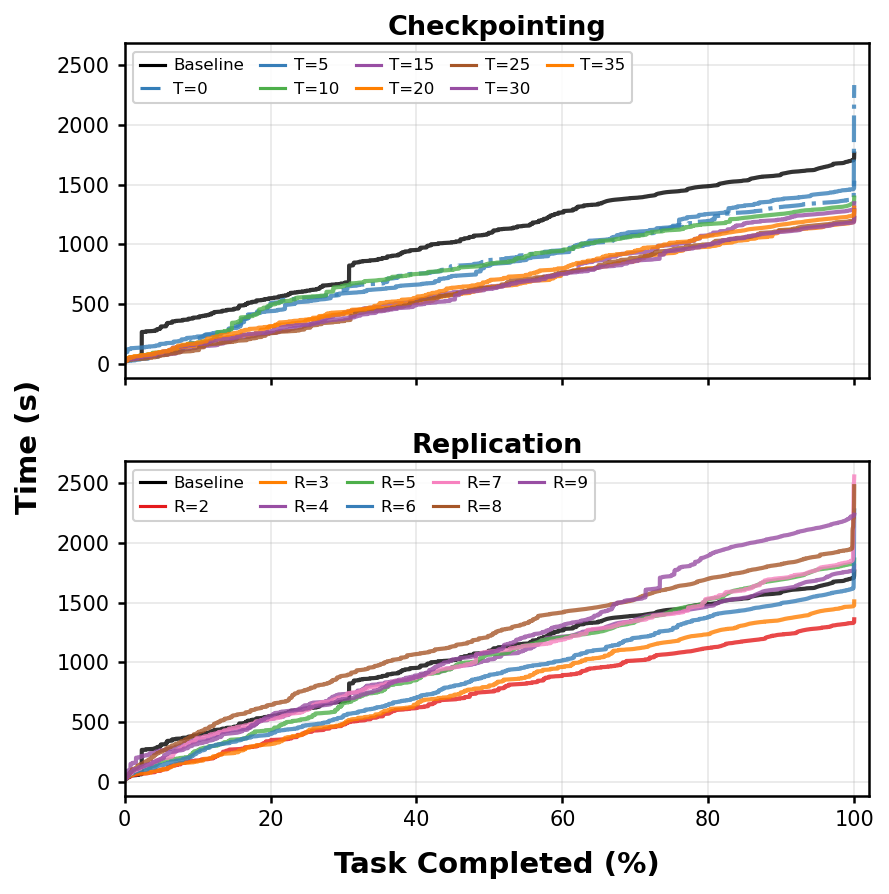

In [9]:
def setup_dual_plot():
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Helvetica'],
        'font.size': 8,
        'axes.linewidth': 1.2,
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.major.width': 1.2,
        'ytick.major.width': 1.2,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        'figure.dpi': 150,
        'savefig.dpi': 300
    })
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True, sharey=True)
    fig.patch.set_facecolor('white')
    
    ax1.grid(True, linestyle='-', alpha=0.3)
    ax2.grid(True, linestyle='-', alpha=0.3)
    
    return fig, (ax1, ax2)

from matplotlib.lines import Line2D

def finalize_dual_plot(fig, ax1, ax2, xlabel='', ylabel='', legend_loc='upper left'):
    from matplotlib.lines import Line2D

    ax1.set_title('Checkpointing', fontweight='bold', pad=4, fontsize=13)
    ax2.set_title('Replication', fontweight='bold', pad=4, fontsize=13)
    
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    ax2.set_xlabel(xlabel, labelpad=10, fontweight='bold', fontsize=14)
    ax2.set_ylabel('')
    fig.supylabel(ylabel, x=0.04, ha='center', va='center', fontweight='bold', fontsize=14)

    # Legend key order
    ckpt_keys = ['exp2_dv5_rc1', 'exp2_dv5_ct0', 'exp2_dv5_ct5', 'exp2_dv5_ct10', 'exp2_dv5_ct15', 'exp2_dv5_ct20', 'exp2_dv5_ct25', 'exp2_dv5_ct30', 'exp2_dv5_ct35']
    repl_keys = ['exp2_dv5_rc1', 'exp2_dv5_rc2', 'exp2_dv5_rc3', 'exp2_dv5_rc4', 'exp2_dv5_rc5', 'exp2_dv5_rc6', 'exp2_dv5_rc7', 'exp2_dv5_rc8', 'exp2_dv5_rc9']

    # Create legend handles from template_mapping
    def build_legend_handles(keys):
        return [
            Line2D([0], [0],
                   color=template_mapping[k]['color'],
                   linestyle=template_mapping[k]['linestyle'],
                   label=template_mapping[k]['label'])
            for k in keys
        ]

    ax1.legend(
        handles=build_legend_handles(ckpt_keys),
        loc=legend_loc,
        bbox_to_anchor=(0, 1, 0.7, 0),
        ncol=5,
        columnspacing=1.0,
        handlelength=1.5,
        handletextpad=0.5,
        frameon=True,
        fancybox=True,
        framealpha=0.9,
        fontsize=8
    )

    ax2.legend(
        handles=build_legend_handles(repl_keys),
        loc=legend_loc,
        bbox_to_anchor=(0, 1, 0.7, 0),
        ncol=5,
        columnspacing=1.0,
        handlelength=1.5,
        handletextpad=0.5,
        frameon=True,
        fancybox=True,
        framealpha=0.9,
        fontsize=8
    )

    plt.tight_layout()
    fig.subplots_adjust(hspace=0.25)


def plot_task_completion_curve_with_tail(task_completion_frames, data_parsers):
    fig, (ax1, ax2) = setup_dual_plot()
    
    baseline_frames = []
    ct_frames = []
    rc_frames = []
    
    for frame, parser in zip(task_completion_frames, data_parsers):
        template_name = parser.runtime_template.split('/')[-1]
        if template_name in template_mapping:
            if template_name == 'exp2_dv5_rc1':
                baseline_frames.append((frame, template_mapping[template_name]))
            elif template_name.startswith('exp2_dv5_ct'):
                ct_frames.append((frame, template_mapping[template_name]))
            elif template_name.startswith('exp2_dv5_rc') and template_name != 'exp2_dv5_rc1':
                rc_frames.append((frame, template_mapping[template_name]))
    
    ct_frames.sort(key=lambda x: int(x[1]['label'].split('=')[1]))
    rc_frames.sort(key=lambda x: int(x[1]['label'].split('=')[1]))
    
    for frame, mapping in baseline_frames:
        if not frame.empty:
            ax1.plot(frame['percent_complete'], frame['completion_time'],
                    linestyle=mapping['linestyle'],
                    color=mapping['color'],
                    linewidth=2.0,
                    alpha=0.8,
                    label=mapping['label'])
            ax2.plot(frame['percent_complete'], frame['completion_time'],
                    linestyle=mapping['linestyle'],
                    color=mapping['color'],
                    linewidth=2.0,
                    alpha=0.8,
                    label=mapping['label'])
    
    for frame, mapping in ct_frames:
        if not frame.empty:
            ax1.plot(frame['percent_complete'], frame['completion_time'],
                    linestyle=mapping['linestyle'],
                    color=mapping['color'],
                    linewidth=2.0,
                    alpha=0.8,
                    label=mapping['label'])
    
    for frame, mapping in rc_frames:
        if not frame.empty:
            ax2.plot(frame['percent_complete'], frame['completion_time'],
                    linestyle=mapping['linestyle'],
                    color=mapping['color'],
                    linewidth=2.0,
                    alpha=0.8,
                    label=mapping['label'])
    
    ax1.set_xlim(0, 100 * 1.02)
    ax2.set_xlim(0, 100 * 1.02)

    # ax1.set_ylim(10**2, 10**4)
    # ax2.set_ylim(10**2, 10**4)
    #ax1.set_yscale('log')
    #ax2.set_yscale('log')
    
    finalize_dual_plot(fig, ax1, ax2, xlabel='Task Completed (%)', ylabel='Time (s)')
    
    return fig

fig = plot_task_completion_curve_with_tail(task_completion_frames, data_parsers)
plt.savefig('imgs/task_completion_curve.pdf', dpi=3000, bbox_inches='tight', facecolor='white')
plt.show()


# Transfer Count

# 

# Tail Latency

In [10]:
def build_tail_metric_df_from_completion_frames(data_parsers, task_completion_frames, template_mapping):
    rows = []

    metrics = [
        ("total", lambda df: df["completion_time"].max()),
        ("p50", lambda df: np.percentile(df["completion_time"], 50)),
        ("p90", lambda df: np.percentile(df["completion_time"], 90)),
        ("p95", lambda df: np.percentile(df["completion_time"], 95)),
        ("p99", lambda df: np.percentile(df["completion_time"], 99)),
    ]

    for parser, frame in zip(data_parsers, task_completion_frames):
        template_name = parser.runtime_template.split('/')[-1].split('.')[0]
        if template_name not in template_mapping or frame.empty:
            continue

        mapping = template_mapping[template_name]
        group = (
            "Baseline" if template_name == "exp2_dv5_rc1"
            else "Checkpointing" if "ct" in template_name
            else "Replication"
        )

        for metric_name, func in metrics:
            value = func(frame)
            rows.append({
                "scheme": template_name,
                "label": mapping["label"],
                "group": group,
                "metric": metric_name,
                "value": value
            })

    df = pd.DataFrame(rows)
    df["group"] = pd.Categorical(df["group"], categories=["Baseline", "Checkpointing", "Replication"], ordered=True)
    df["metric"] = pd.Categorical(df["metric"], categories=["total", "p99", "p95", "p90", "p50"], ordered=True)
    return df


task_completion_frames = [get_task_completion_frame(p.tasks) for p in data_parsers]
df = build_tail_metric_df_from_completion_frames(data_parsers, task_completion_frames, template_mapping)


In [11]:
def plot_tail_metric_breakdown(df, save_path=None):
    import matplotlib.pyplot as plt
    import numpy as np

    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Helvetica'],
        'font.size': 11,
        'axes.linewidth': 1.2,
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.major.width': 1.2,
        'ytick.major.width': 1.2,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        'figure.dpi': 1000,
        'savefig.dpi': 1000
    })

    pastel_palette = {
        "total": "#a6cee3",
        "p99": "#cab2d6",
        "p95": "#fb9a99",
        "p90": "#fdbf6f",
        "p50": "#b2df8a"
    }

    hatch_styles = {
        "total": "//",
        "p99": "oo",
        "p95": "..",
        "p90": "xx",
        "p50": "\\\\"
    }

    metric_order = ["total", "p99", "p95", "p90", "p50"]
    df["metric"] = pd.Categorical(df["metric"], categories=metric_order, ordered=True)

    bar_spacing = 0.10
    fig_width = 12
    fig_height = 7
    width_ratios = [1, 8, 8]
    wspace = 0.05
    top_margin = 0.82
    y_max_factor = 1.15

    fig, axes = plt.subplots(1, 3, figsize=(fig_width, fig_height), sharey=True,
                             gridspec_kw={'width_ratios': width_ratios})
    fig.patch.set_facecolor('white')

    global_max = df["value"].max()

    def extract_numeric_key(label):
        if "=" in label:
            return int(label.split("=")[1])
        return -1

    for i, group in enumerate(["Baseline", "Checkpointing", "Replication"]):
        ax = axes[i]
        group_df = df[df["group"] == group].copy()

        scheme_order = (
            group_df
            .drop_duplicates("scheme")
            .assign(sort_key=lambda d: d["label"].map(extract_numeric_key))
            .sort_values("sort_key")["scheme"].tolist()
        )

        offset_range = np.linspace(-bar_spacing * 2, bar_spacing * 2, len(metric_order))

        for j, scheme in enumerate(scheme_order):
            scheme_df = group_df[group_df["scheme"] == scheme].sort_values("metric")
            for offset, (_, row) in zip(offset_range, scheme_df.iterrows()):
                ax.bar(j + offset, row["value"],
                       width=bar_spacing,
                       color=pastel_palette[row["metric"]],
                       hatch=hatch_styles[row["metric"]],
                       edgecolor="#333333",
                       linewidth=1.0,
                       zorder=2)

        tick_labels = (
            group_df
            .drop_duplicates("scheme")
            .set_index("scheme")
            .loc[scheme_order]["label"]
            .tolist()
        )

        ax.set_xticks(range(len(scheme_order)))
        ax.set_xticklabels(tick_labels if group != "Baseline" else [""] * len(scheme_order),
                           fontsize=13, rotation=35)

        ax.set_xlim(-0.5, len(scheme_order) - 0.5)
        ax.set_ylim(0, global_max * y_max_factor)

        if group == "Checkpointing":
            ax.set_xlabel("Checkpoint Threshold", fontsize=20, fontweight='bold', labelpad=10)
        elif group == "Replication":
            ax.set_xlabel("Replica Count", fontsize=20, fontweight='bold', labelpad=10)
        else:
            ax.set_xlabel("")

        if i == 0:
            ax.set_ylabel("Time (s)", color='#333333', fontsize=20, fontweight='bold')
        else:
            ax.set_ylabel("")

        ax.set_title(group, fontsize=20, fontweight='bold', color='#333333', pad=16)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('#999999')
        ax.spines['bottom'].set_color('#999999')
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5)
        ax.grid(True, color='#c0c5cc', linestyle='-', linewidth=0.5, zorder=0)

    handles = [
        plt.Rectangle((0, 0), 1, 1,
                      facecolor=pastel_palette[m],
                      hatch=hatch_styles[m],
                      edgecolor="#333333",
                      linewidth=1.0,
                      label=m.upper())
        for m in metric_order
    ]

    fig.text(0.95, 0.92,
         "* pX denotes the latency by which X% of tasks have completed",
         fontsize=12, color='#555555', style='italic', ha='right')

    fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, 1.03),
               ncol=5, frameon=True, fancybox=True, fontsize=20)

    plt.tight_layout()
    fig.subplots_adjust(wspace=wspace, top=top_margin, bottom=0.12)

    plt.savefig('imgs/tail_metric_breakdown.pdf', dpi=1000, bbox_inches='tight', facecolor='white')
    plt.show()

plot_tail_metric_breakdown(df)
